# 'OR' Binary Classification 

주어진 데이터를 분류하는 `분류(classificaion)`문제를 살펴보자. 분류 중에서 주어진 데이터를 두 개의 그룹(0 또는 1)으로 분류하는 이진 분류(binary classification)을 다룰 것이다. 회귀분석과 달리 이진 분류는 최종 레이어 $H$를 정의할 때 `Sigmoid`를 사용한다.

| $X$ | $y$  |
|:---:|:---:|
|  (0,0) | 0  |
|  (0,1) | 1  |
|  (1,0) | 1  |
|  (1,1) | 1  |


$X$와 $y$가 위와 같이 주어져 있다고 했을 때 $X$와 $y$사이를 잘 설명하는

$$
H(X) = s(XW + b) = s( w_1 \cdot x_1 + w_2 \cdot x_2 +b)
$$

를 찾는 것이다. 여기서 $s(z):=\frac{1}{1+e^{-z}}$이고 $W = (w_1, w_2)$이다. 즉, 주어진 데이터를 잘 설명하는 $H(X)$의 $W$와 $b$를 찾는 것 이다. 

![](data/binary1.png)

cost 함수는 MSE가 아닌 Cross Entropy을 사용한다.

### 분류(classificaion)의 cost 함수
cost 함수란 실제값 $Y$와 모델이 예측한 값 $H$의 차이를 측정(measure)하는 함수로 예측값 $H$가 실제값 $Y$를 잘 예측하기 위해 cost함수를 최소화하는 방향으로 $W$와 $b$를 업데이트해야 한다. 회귀분석(regression)에서는 cost 함수를 MSE(Mean square error)로 정의하였는데 분류문제에서 cost 함수를 MSE로 정의하면 지나치게 작은 Sigmoid 함수의 미분계수로 인해서 weight와 bias가 제대로 업데이트 되지 않는다. 이를 확인하기 위해 MSE로 정의한 cost 함수와 $w_1$에대한 편미분을 확인해보자.

$$\begin{align*}
\text{MSE}(W,b) &= \frac{1}{4}\sum_{i=1}^4 \big  (H(X_i)-y_i \big )^2   = \frac{1}{4}\sum_{i=1}^4 \big  (s( w_1 \cdot x_{i1} + w_2 \cdot x_{i2} +b)-y_i\big)^2 \\
&= \frac{1}{4} \left \{ \big(s(b)\big)^2 +\big(s(w_2+b)-1\big)^2 +\big(s(w_1+b)-1\big)^2 + \big(s(w_1+w_2+b)-1\big)^2 \right \}
\end{align*}$$

이고

$$\begin{align*}
\frac{\partial \text{MSE}(W,b)}{\partial w_1} &= \frac{1}{4} \left \{ 2\big(s(w_1+b)-1\big)\cdot \frac{\partial s(w_1+b)}{\partial w_1} + 2\big(s(w_1+w_2+b)-1\big)\cdot \frac{\partial s(w_1+w_2+b)}{\partial w_1}  \right \} \\
&= \frac{1}{4} \Big \{ 2\big(s(w_1+b)-1\big)\cdot s(w_1+b)\cdot \big(1-s(w_1+b) \big ) \\
& \quad+ 2\big(s(w_1+w_2+b)-1\big)\cdot s(w_1+w_2+b)\cdot \big(1-s(w_1+w_2+b)\big) \Big \}.
\end{align*}$$

**Weight와 bias의 초깃값과 Sigmoid함수의 성질에 의해 편미분계수가 지나치게 작은 값이 나오기 때문에 weight와 bias가 제대로 업데이트가 되지 않는다. 그래서 이진 분류문제의 cost 함수는 MSE가 아닌 Cross Entropy로 정의한다.**


$$\begin{align*}
\text{cost}(W,b) &= - \frac{1}{4}\sum_{i=1}^4 \Big( y_i \cdot \log(H(X_i)) + (1 - y_i) \cdot \log(1 - H(X_i)) \Big)\\
&= - \frac{1}{4} \Big (\log(1 - s(b)) +  \log s(w_2+b) + \log s(w_1+b) +  \log s(w_1+w_2+b) \Big ).
\end{align*}$$

MSE와 비교를 위해서 Cross Entropy의 $w_1$에 대한 편미분을 구하면 다음과 같다.

$$
\frac{\partial \text{cost}(W,b)}{\partial w_1} = -\frac{1}{4} \left ( \big(1-s(w_1+b) \big) + \big(1-s(w_1+w_2+b)\big) \right)
$$


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

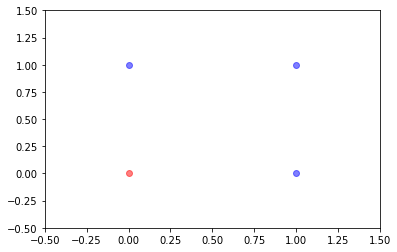

In [2]:
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]

y_data = [[0],
         [1],
         [1],
         [1]]

plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)

for i, j in enumerate(y_data):
    if j == [0] : 
        _ = plt.plot(x_data[i][0], x_data[i][1], "ro", alpha=0.5)
    else :
        _ = plt.plot(x_data[i][0], x_data[i][1], "bo", alpha=0.5)

In [3]:
# Logistic regression model

X = tf.placeholder(tf.float32, shape=[None,2])
Y = tf.placeholder(tf.float32, shape=[None,1])

H = tf.layers.dense(X, 1, activation=tf.nn.sigmoid)

loss = - tf.reduce_mean(Y * tf.log(H) + (1 - Y) * tf.log(1 - H))
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

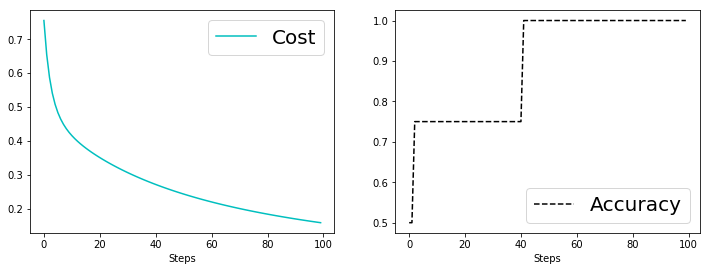

In [4]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

cost_list = []
acc_list = []

iteration = 100
for step in range(iteration):
    acc, cost, _, = sess.run([accuracy, loss,  train], feed_dict={X: x_data, Y: y_data})
    cost_list.append(cost)
    acc_list.append(acc)
#     if (step+1) % (iteration//10) ==0:
#         print("Step : %i, Cost : %s  Accuracy : %s" %(step+1, cost, acc)) 

plt.figure(figsize=(12,9))     
plt.subplot(221)
plt.xlabel("Steps")
_ = plt.plot(cost_list, "c", label='Cost')
_ = plt.legend(fontsize=20)

plt.subplot(222)
plt.xlabel("Steps")
_ = plt.plot(acc_list, "k--", label='Accuracy')
_ = plt.legend(fontsize=20)